Nous allons nous intéresser dans ce cours à la matrice de covariance d'un groupe de points, et voir comment refaire l'exercice de la régression linéaire avec une approche différente, qui repose sur le principe de la réduction de dimension.

Avant d'aller plus loin, on génère notre nuage de points

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
params  = (0,10)
var = 5
N = 100
# vecteurs de N points aléatoires entre 0 et 10
x = 
# p0 + p1*x + bruit gaussien N(0,var) 
y = 

In [1]:
# représenter les couples (xi, yi)


Si nous disposons d'un jeu de données écrit sous la forme suivante :

$$X = \left[ \begin{array}{c} X_1 \\ X_2 \\ \vdots \end{array} \right]$$

La matrice de covariance est la matrice avec les entrées suivantes

$$ \sigma_{ij} = \frac {1}{N-1} \sum_{k=1}^N (X_{ki}-\bar X_i) (X_{kj} - \bar X_j)$$

A quoi correspondent les entrées diagonales ?
A quoi ressemble cette matrice dans notre cas ?

In [ ]:
def covariance(x,y):
    pass

def Matrice_covariance_2D(x,y):
    pass

M = Matrice_covariance_2D(x,y)
np.testing.assert_almost_equal(M, np.cov(x,y)) #on compare avec l'implémentation numpy

In [9]:
M = np.cov(x,y)
print(M)

[[   8.79226519   87.58751812]
 [  87.58751812  894.3021933 ]]


## Matrices et géométrie

Une matrice est une application linéaire. La matrice de covariance est une matrice symétrique qui peut être interprétée comme un endormorphisme sur un espace vectoriel, correspondant aux vecteurs des données.

Nous allons interpréter géométriquement cette matrice. Si vous n'avez pas d'intuition sur les matrices, vous pouvez allez sur le lien suivant : http://ncase.me/matrix/

### Matrice de rotation
Un exemple connu de matrice sont les matrices de rotation. Pour un vecteur à 2 dimension, elles s'écrivent sous la forme

$$ R(\theta) =  \begin{pmatrix}  \cos \theta & - \sin \theta \\ \sin \theta & \cos \theta \end{pmatrix} $$

Ces matrices sont orthogonales $R^T = R^{-1}$, de sorte qu'elles conservent la norme des vecteurs, et leur déterminant vaut 1.

In [4]:
u = np.array([1,0])

def rotation_matrix(theta):
    from math import cos, sin
    pass

def rotate(v, theta):
    R = rotation_matrix(theta)
    pass

u_prime = rotate(u, 3.14159/2) #rotation de u de 90°

assert np.linalg.norm(u) == np.linalg.norm(u_prime)
assert np.linalg.det(rotation_matrix(3.14159/2)) == 1 # pourquoi ?

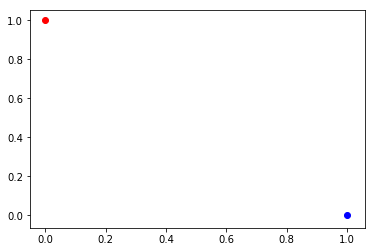

In [5]:
plt.scatter(u[0], u[1], color="blue")
plt.scatter(u_prime[0], u_prime[1], color="red") 
plt.show()

### Géométrie de la matrice de covariance

Afin de mieux comprendre cette matrice, nous allons d'abord générer un nuage de points totalement aléatoire.

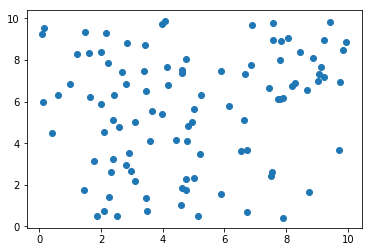

In [6]:
u = 10*np.random.random(N)
v = 10*np.random.random(N)

plt.scatter(u,v)
plt.show()

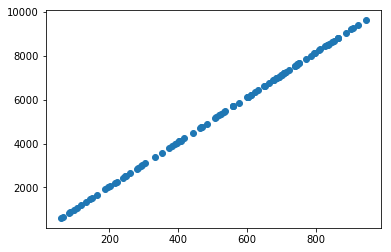

In [10]:
UV = np.dot(M, np.vstack((u,v)))
plt.scatter(UV[0], UV[1])
plt.show()

La matrice de correlation calculée depuis nos x et y initiaux à transformer u, v en les alignant sur un axe particulier, qui semble correspondre à la relation entre x et y.

## Valeurs propres et vecteurs propres

La matrice semble avoir une direction privilégiée. Que peut-on apprendre à partir des valeurs et vecteurs propres ?

In [13]:
# calcul des valeurs et vecteurs propres
eig_val, eig_vec = 

In [14]:
for i in range(2):
    print('à la valeur propre', eig_val[i], 'correspond le vecteur', eig_vec[:,i])

à la valeur propre 0.211953062868 correspond le vecteur [-0.99523591  0.09749602]
à la valeur propre 902.882505426 correspond le vecteur [-0.09749602 -0.99523591]


In [ ]:
# Comment peut-on calculer le coefficient de la droite ?
pass

Nous avons retrouver, simplement par l'analyse de la matrice de covariance, le coefficient de la droite qui explique le nuage de points initial x et y

# Illustration avec Iris

https://archive.ics.uci.edu/ml/datasets/Iris

150 fleurs iris de 3 espèces différentes.

Les données se composent de :
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class:   
-- Iris Setosa    
-- Iris Versicolour   
-- Iris Virginica   

Nous allons utiliser la librairie pandas pour plus de simplicité

In [15]:
import pandas as pd

df = pd.read_csv('iris.data', header=None, sep=',')
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
df.describe()

,sepal_len,sepal_wid,petal_len,petal_wid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Nous pouvons facilement séparer les colonnes en utilisant les noms que nous avons défini plus haut

In [17]:
X = df[['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']]
y = df['class']

Utilisons le module PCA de scikit-learn

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_fit = pca.fit_transform(X)

On peut rapidement voir que nous sommes bien passés à un espace réduit

In [19]:
print(X.shape[1])
print(X_fit.shape[1])

4
2


L'avantage est que nous pouvons maintenant représenter graphiquement les données sur un seul plan

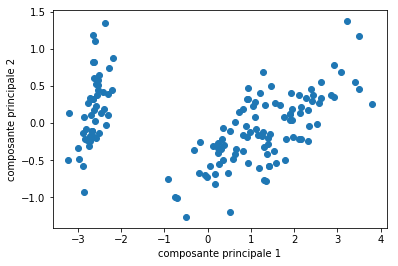

In [20]:
plt.scatter(X_fit[:,0], X_fit[:,1])
plt.xlabel("composante principale 1")
plt.ylabel("composante principale 2")
plt.show()

Ajoutons un peu de couleur

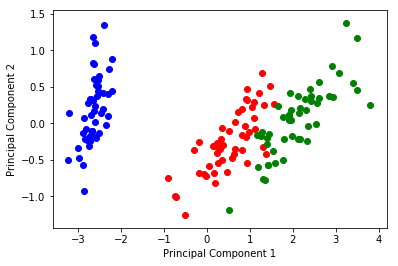

In [21]:
plt.figure(figsize=(6, 4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                    ('blue', 'red', 'green')):
    plt.scatter(X_fit[np.array(y==lab),0],
                X_fit[np.array(y==lab), 1],
                label=lab,
                c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

La PCA est très souvent utilisée en amont d'autres algorithmes pour réduire la compléxité et le bruit dans les données, et pour améliorer les performances de calcul.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(X_fit)
plt.scatter(X_fit[:, 0], X_fit[:, 1], c=kmeans.labels_)

In [ ]:
list(zip(kmeans.labels_, y))

In [ ]:
from sklearn.metrics import confusion_matrix
mapping = {'Iris-setosa':0, 'Iris-versicolor':2, 'Iris-virginica':1}
confusion_matrix(kmeans.labels_, y.replace(mapping))

In [ ]:
plot_confusion_matrix(confusion_matrix(kmeans.labels_, y.replace(mapping)), ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'])

In [ ]:
#    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')